# Random Forest Example using Brazilian Absenteeism Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline
import pandas
import numpy
numpy.random.seed = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Import Data 

In [2]:
data = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/\
python_nb_sklearn_random_forest/Absenteeism_at_work_AAA/Absenteeism_at_work.csv",
                      sep = ";")

In [3]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [5]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
vc = data["Absenteeism time in hours"].value_counts()
vc2 = vc.reset_index()

In [7]:
vc2.sort_values(by = "index")

,index,Absenteeism time in hours
5,0,44
3,1,88
1,2,157
2,3,112
4,4,60
9,5,7
17,7,1
0,8,208
6,16,19
7,24,16


In [8]:
import seaborn
seaborn.set(rc = {"figure.figsize":(14
                                    ,8)})
seaborn.set_style("whitegrid")

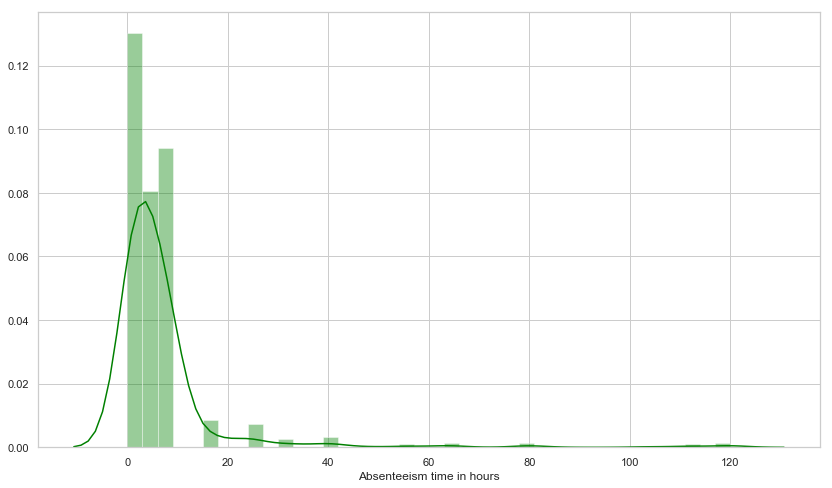

In [9]:
seaborn.distplot(data["Absenteeism time in hours"], bins=40, color = "green")

### Set threshhold for acceptable amount of absenteeism and split data based on that into classes


In [10]:
def greater_than_threshhold(number):
    
    threshhold = 18
    
    if number >= threshhold:
        return "Unacceptable"
    else:
        return "Acceptable"

In [11]:
data["hour_class"] = data["Absenteeism time in hours"].apply(greater_than_threshhold)

In [12]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,hour_class
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,Acceptable
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,Acceptable
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,Acceptable
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,Acceptable
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,Acceptable


In [14]:
test_data = data.drop(["ID", "Reason for absence", "Absenteeism time in hours"], axis = 1)

### Create feature matrix and target vector

In [15]:
X = test_data.drop(["hour_class"], axis = 1)
y = test_data["hour_class"]

In [16]:
X.shape

(740, 18)

In [17]:
X.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [18]:
y.head()

0    Acceptable
1    Acceptable
2    Acceptable
3    Acceptable
4    Acceptable
Name: hour_class, dtype: object

In [19]:
y.shape

(740,)

### Instantiate model using RandomForestClassifier

In [20]:
clf = RandomForestClassifier(n_estimators = 120,
                             n_jobs = 2,
                            random_state = 0)


### Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, n_features_to_select = 12)
rfe = rfe.fit(X, y)
results = list(rfe.support_)

In [23]:
rfe_data = pandas.concat([pandas.Series(results), pandas.Series(X.columns)], axis = 1)
rfe_data.columns = ["flag", "column_name"]

In [24]:
rfe_data

,flag,column_name
0,True,Month of absence
1,True,Day of the week
2,True,Seasons
3,True,Transportation expense
4,True,Distance from Residence to Work
5,True,Service time
6,True,Age
7,True,Work load Average/day
8,True,Hit target
9,False,Disciplinary failure


In [25]:
relevant_columns = list(rfe_data[rfe_data["flag"] == True]["column_name"])

In [26]:
relevant_columns

['Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index']

In [27]:
X = X[relevant_columns]

### Split dataset into training and testing sets 

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                               random_state = 42,
                                               test_size = 0.30)

### Fit model to training data

In [29]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predict against Xtest set using model

In [30]:
prediction = clf.predict(Xtest)

### Show Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
acc = accuracy_score(prediction, ytest)

print("Accuracy of prediction against test data: {0:.2%}".format(acc))

Accuracy of prediction against test data: 93.69%


### Confusion Matrix, predicted vs true labels

Text(275.613,0.5,'Predicted label')

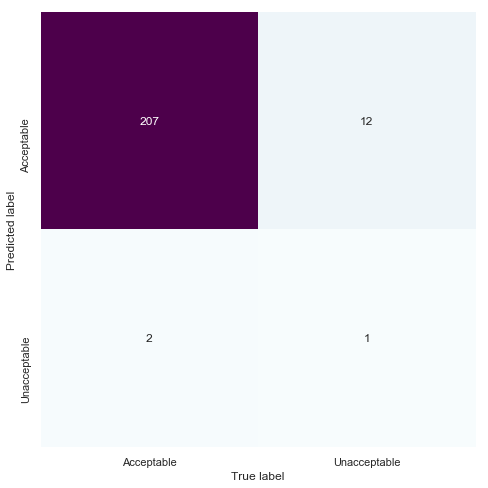

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

matrix = confusion_matrix(ytest, prediction)
seaborn.heatmap(matrix.T, 
                square = True, 
                annot = True, 
                fmt = "d", 
                cmap = "BuPu",
                cbar = False,
                xticklabels = list(ytest.unique()),
                yticklabels = list(ytest.unique()))

plt.xlabel("True label")
plt.ylabel("Predicted label")